### Iris Dataset: Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("rainbow")
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/Iris.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'], dtype='object')

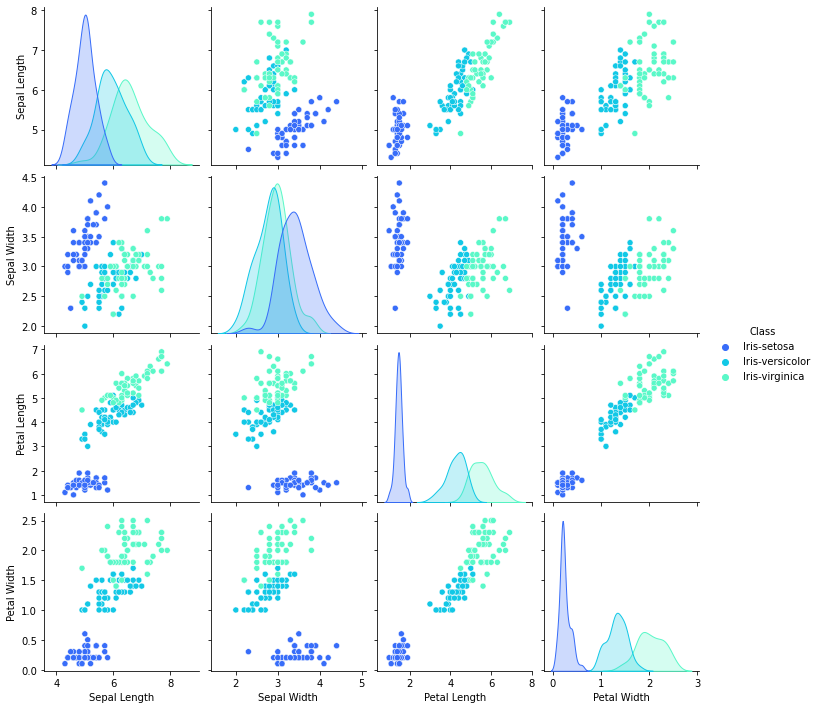

In [6]:
sns.pairplot(df,hue='Class');

<AxesSubplot:xlabel='Class', ylabel='count'>

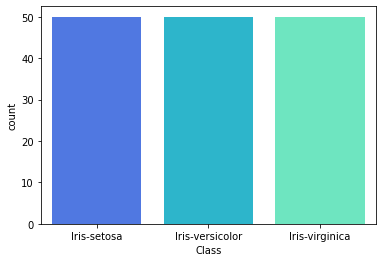

In [7]:
sns.countplot(x = 'Class', data = df)

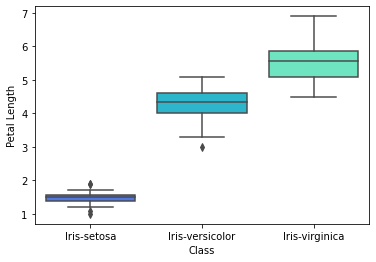

In [8]:
sns.boxplot(x= 'Class',y = 'Petal Length', data = df);

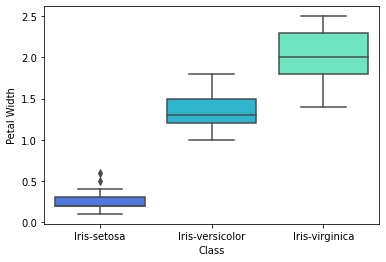

In [9]:
sns.boxplot(x= 'Class',y = 'Petal Width', data = df);

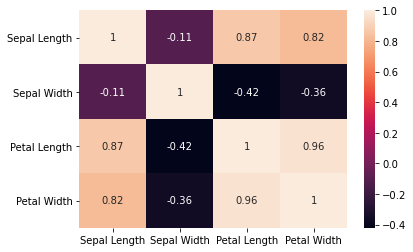

In [10]:
sns.heatmap(df.corr(), annot=True);

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class',axis=1)
y = df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_rfc = RandomForestClassifier(n_estimators=200)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [16]:
y_pred = model_rfc.predict(X_test)

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

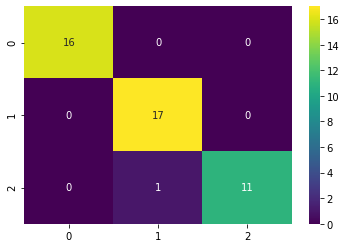

In [18]:
sns.heatmap(cm, annot=True,fmt=".0f",cmap='viridis');

### Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



### ROC Curve in Multiclass

In the iris dataset, we have 3 classes of flowers and 4 features in total. So the classification problem is not a binary case anymore since we have 3 classes. However, the following code will estimate and plot the ROC curve for our multi-class classification problem.
To this end, the model will be used for class 1 vs class 2, class 2 vs class 3 and class 1 vs class 3. So, we have 3 cases at the end and within each case, the bias will be varied in order to get the ROC curve of the given case — so, 3 ROC curves as output.

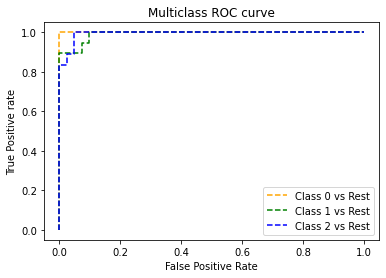

In [56]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    